### 합성곱 신경망(CNN)

In [1]:
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# 데이터 불러오기
from tensorflow.keras import datasets
(X_tn0,y_tn0),(X_te0,y_te0)=datasets.mnist.load_data()

In [3]:
# 데이터 차원확인
print(X_tn0.shape) #(이미지 개수, 행, 열)
print(y_tn0.shape)
print(X_te0.shape)
print(y_te0.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


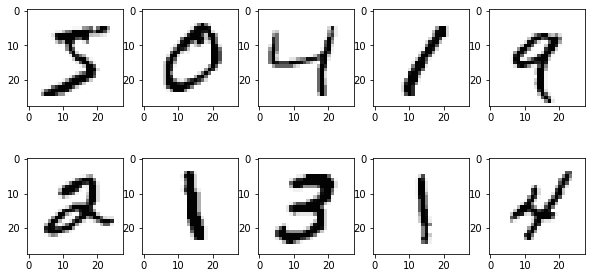

[5 0 4 1 9 2 1 3 1 4]


In [4]:
# 오리지널 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(2*5):
    plt.subplot(2,5,i+1)
    plt.imshow(X_tn0[i].reshape((28,28)),
               cmap='Greys')
plt.show()
print(y_tn0[0:10])

In [5]:
# 타겟 클래스 확인
set(y_tn0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
# 피처 데이터 스케일 조정
X_tn_re = X_tn0.reshape(60000, 28, 28, 1) #합성곱 신경망이 데이터 차원은 (이미지 개수, 행, 열, 채널 수) 이다.
X_tn = X_tn_re/255 #이미지 픽셀값은 [0,255]인데 최댓값이 1이 되도록 조정해줌

X_te_re = X_te0.reshape(10000, 28, 28, 1)
X_te = X_te_re/255

In [7]:
# 타겟 데이터 원-핫 인코딩
from tensorflow.keras.utils import to_categorical
y_tn = to_categorical(y_tn0)
y_te = to_categorical(y_te0)

In [8]:
# 합성곱 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout

n_class = len(set(y_tn0))

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5),
                 input_shape=(28,28,1),
                 padding='valid',
                 activation='relu')) #padding valid/same, valid는 패딩 하지 않겠다는 말
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #사용하지 않을 노드의 비율
model.add(Conv2D(32, kernel_size=(3,3),
                 padding='valid',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(n_class, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

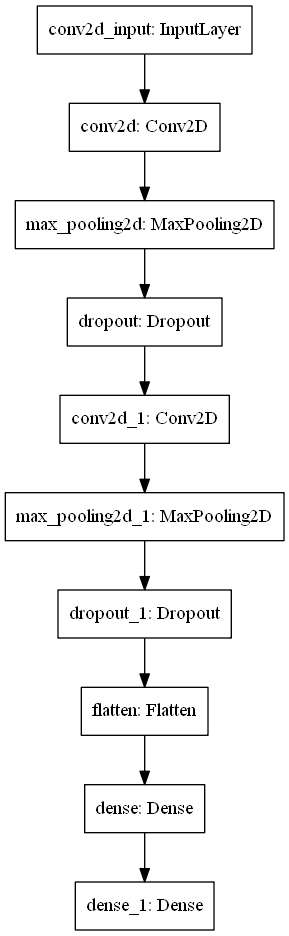

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model)

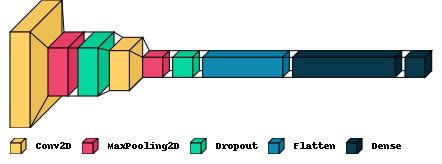

In [10]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
hist = model.fit(X_tn,y_tn, epochs=3, batch_size=100)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 15s 252us/sample - loss: 0.1992 - accuracy: 0.9399
Epoch 2/3
60000/60000 [==============================] - 15s 252us/sample - loss: 0.0597 - accuracy: 0.9811
Epoch 3/3
60000/60000 [==============================] - 15s 243us/sample - loss: 0.0445 - accuracy: 0.9862


In [13]:
print(model.evaluate(X_tn,y_tn)[1])
print(model.evaluate(X_te,y_te)[1])

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [14]:
y_pred_hot = model.predict(X_te)
print(y_pred_hot[0])
import numpy as np
y_pred = np.argmax(y_pred_hot,axis=1)
print(y_pred)
diff = y_te0 - y_pred
diff_idx = []
y_len = len(y_te0)
for i in range(0, y_len):
    if(diff[i]!=0):
        diff_idx.append(i)

[2.1208258e-08 2.3075033e-07 4.6235136e-06 4.9487368e-05 3.8436885e-09
 7.2543718e-09 1.1847366e-12 9.9993658e-01 8.5785513e-07 8.2498536e-06]
[7 2 1 ... 4 5 6]


actual: 4, predict: 2
actual: 6, predict: 0
actual: 3, predict: 5
actual: 8, predict: 2
actual: 2, predict: 1
actual: 7, predict: 3
actual: 4, predict: 9
actual: 3, predict: 5
actual: 8, predict: 9
actual: 6, predict: 5


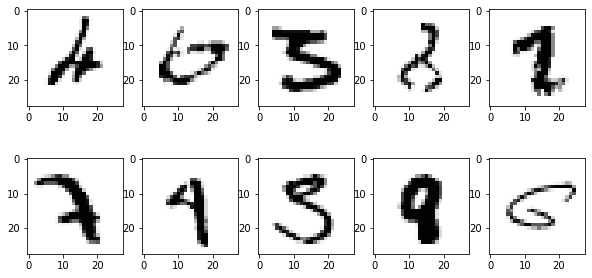

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(2*5):
    plt.subplot(2,5,i+1)
    raw_idx = diff_idx[i]
    plt.imshow(X_te0[raw_idx].reshape((28,28)),
               cmap='Greys')
    print('actual: %s, predict: %s'%(y_te0[raw_idx],y_pred[raw_idx]))
plt.show()